# NLP_GoingDeeper | 01. 텍스트 데이터 다루기

- 우리는 일상에서 신문기사, 메시지, 간판 등 수많은 문장 속에서 살아갑니다.
- 이 모든 것들은 일상에서 자연스럽게 발생하여 쓰이는 언어, **자연어(Natural Language)**라고 부릅니다. 

---


### 자연어와 인공어
- 자연어의 반대말은? 인공어(Artificial Language)? 
- 프로그래밍 언어(Programming Language)는 대표적인 인공어라고 할 수 있습니다. 예를들어 파이썬이 있습니다. 
- 그렇다면 우리가 일상적으로 사용하는 자연어와 프로그래밍 언어 사이의 본질적 차이가 무엇일까요? 
- 전산학 컴파일러 수업에서는 언어의 문법에 대한 이론을 배우게 되는데, 문맥 자유 문법(Context-Free Grammer), 문맥 의존 문법(Context-Sensitive Grammer)라는 용어가 나옵니다.
- 문법들은 그 생성규칙이 얼마나 자유로운 형태를 갖는가, 혹은 제약된 형태를 갖는가에 따라 네가지의 등급으로 분류됩니다. 가장 자유로운 정도가 큰 문법을 무제약 문법 (unrestricted grammar) 이라고 부르며, 여기에 차례로 제약을 가하여 규칙의 자유도를 낮춰 나감에 따라 문맥의존 문법, 문맥자유 문법, 정규문법 (regular grammar) 들이 얻어집니다.
- 자연어와 프로그래밍 언어는 형식언어 이론상 각각 문맥의존 문법(Context-sensitive Grammar), 문맥자유 문법(Context-free Grammar)을 따릅니다.
- 프로그래밍 언어는 인위적으로 만들어진 언어이기 때문에 처리의 용이성을 중시하여 문맥자유 문법으로 설계되었으며, 특히 문법의 모호함이 없도록 주의를 기울여 만들어졌습니다.
- 반면 자연어는 인류 역사 속에서 생겨나 세심한 설계 없이 자연 발생적으로 만들어졌기 때문에 문맥의존 문법에 해당합니다. 문맥의존 문법을 효율적으로 처리해주는 알고리즘은 아직 개발되어 있지 못하기 때문에, 자연어처리는 보통 문맥자유 문법을 기본으로 하여, 문맥 의존적 요소를 처리할 수 이쓴ㄴ 기능을 부가하는 방향으로 이뤄지고 있습니다. 
- 기계적으로 언어를 해석하는 파서를 만들었을 때 그 언어는 문맥자유 문법(Context-free Grammar)을 따르는 언어여야 해석상 의미의 모호성이 없이 파싱트리를 만들 수 있습니다.
- 모든 프로그래밍 언어는 문맥과 상황에 따라 그 뜻이 달라지지 않는 언어, 다시 말해 문맥을 완전히 배제하고 해석 가능한 언어, 즉 Context-free Grammar를 따르는 언어이기 때문입니다.
- 컴퓨터를 통한 자연어처리의 어려움은 2016년 google에서 선보인 자연어 파서 모델에서도 드러납니다. 
- "Alice drove down the street in her car" 라는 문장은 두가지로 해석될 수 있는 모호성을 가지고 있습니다. "앨리스는 자기 차를 운전하여 거리를 달려갔다.", "앨리스는 자기 차 안에 있는 거리를 운전해 달려갔다." 문법적으로 가능한 두 가지 해석 중에서 적절한 것을 파악하려면 real world knowledge, 즉 현실 세계에 대한 지식(예를 들어 '자동차 안에 거리가 있을 리는 없다')이 필요합니다. 만약 위 예시 문장의 Alice 가 소설 '이상한 나라의 앨리스'의 Alice라면, 자동차 안에 사람이 다니는 거리가 존재할 수도 있겠죠! 
- 이처럼 **자연어는 문맥 따라 해석이 달라질 수 있습니다.** 때문에, 훌륭한 자연어처리 모델을 만들기 위해서는, 단순히 언어의 문법만으로는 충분하지 않고, 그 **언어의 의미**까지 이해하는 과정이 필요합니다. 

- 참고 : [자연어와 프로그래밍언어](http://www.aistudy.co.kr/linguistics/natural/language_kim.htm), [2016 구글 자연어 파서모델](https://ai.googleblog.com/2016/05/announcing-syntaxnet-worlds-most.html)


### 토큰화
- **워드 벡터 기법**은 단어 속에 담긴 의미를 어떤 의미 벡터 공간에 매핑하는 기법입니다. 프로그래밍을 통해 파서를 만드는 방식으로는 도저히 해낼 수 없었던 자연어처리 태스크가, 이러한 머신러닝 기법을 통해 단어 속의 의미를 파악하는 과정을 통해 훨씬 정확하게 처리될 수 있는 가능성이 생겼습니다. 
- 하지만 자연어를 단어 의미 단위로 쪼개 내는 작업 자체도 쉽지 않습니다. 
- 자연어를 의미 단위로 쪼개는 토큰화(Tokenization) 기법은 자연어처리 모델의 성능에 결정적인 영향을 미칩니다. 토크나이저가 문장을 단어로 쪼개는 방식에 따라 같은 문장도 완전히 다른 워드 벡터 리스트가 되기 때문입니다. 
- 특히 Wordpiece Model 같은 Subword level 처리 기법은 최신 자연어처리 모델에 필수적으로 자리잡고 있으므로, 이러한 아이디어가 나오기 전까지의 자연어 전처리와 토큰화 과정을 이해하는 것은 매우 중요합니다. 

---

### 학습 목표
- 분산 표현에 대한 직관적 이해를 얻습니다.
- 문장 데이터를 정제하는 방법을 배웁니다.
- 토큰화의 여러 가지 기법들을 배웁니다.
- 단어 Embedding을 구축하는 방법을 살짜쿵 경험해봅니다. 

### 학습 목차



0. 준비
1. 전처리 : 자연어의 노이즈 제거
    - 문장부호
    - 대소문자
    - 특수문자
    - 정규표현식
    
2. 분산표현 : 고구마와 옥수수의 관계를 어떻게 표현할까?
    - 단어의 희소표현과 분산표현
3. 토큰화 : 그녀는? 그녀+는?
    - 공백 기반 토큰화
    - 형태소 기반 토큰화

4. 한국어 형태소 분석기 비교 실험
    - KoNLPy
    - Khaiii
    - OOV(Out-Of-Vocabulary)문제
5. Wordpiece Model(WPM) : 단어의 조각들
    - BPE (Byte Pair Encoding)
    - WPM (Wordpiece Model)
6. 토큰에게 의미를
    - Word2Vec
    - FastText
    - ELMo - Contextualized Word Embedding
    

    

# 0. 준비

In [1]:
#- 작업디렉토리 구성
! mkdir -p ~/aiffel/text_preprocess

```python
#- 카카오에서 제공하는 Khaiii 형태소 분석기 설치

$ sudo apt install cmake   # Khaiii의 빌드 과정을 위해 cmake를 필요로 합니다.
$ pip install torch     # Khaiii는 구동을 위해 파이토치를 필요로 합니다. 
$ cd ~/aiffel/text_preprocess
$ git clone https://github.com/modulabs/khaiii_wrapper.git
$ cd ~/aiffel/text_preprocess/khaiii_wrapper/khaiii_pos
$ ./install_khaiii.sh
```

# 1. 전처리 : 자연어의 노이즈 제거
- 이상적인 데이터의 형태는 교과서적인 문장들입니다. (노이즈가 없음)
- 앞으로 우리가 다루게 될 언어 모델(Language Model)은 단어가 출현하게 될 확률 모델로 이뤄져 있기 때문에, 언어 출현 확률의 일정한 패턴을 통계적으로든 딥러닝을 이용해서든 학습시키려면 문법이나 언어 사용 관습의 일정한 패턴을 따른 텍스트 데이터가 이상적입니다. 
- 하지만 우리가 사용하는 일상어들은 교과서적인 문장에서 예외적으로 변형될 여지가 무궁무진하며, 이러한 변형들이 자연어처리 모델 입장에서는 노이즈가 됩니다. 
- 채팅 데이터의 경우, 띄어쓰기와 맞춤법, 약어 사용 등 일정한 패턴을 따르지 않습니다. 
- 따라서 일반적으로 소설책이나, 신문 기사와 같이 맞춤법이 비교적 정확하고 노이즈가 적은 데이터를 사용하거나 혹은 여러 가지 테크닉으로 노이즈를 제거하는 전처리를 해줍니다. 
- 그러나 채팅데이터와 같은 비정형적인 경우에도, 데이터의 양이 무지막지해서 모든 변형을 학습할 수 있다면 학습이 가능할 것입니다. 
- 하지만 우리는 무지막지한 데이터를 보유하지 못하기 때문에, 여러가지 테크닉으로 노이즈를 제거하는 방법을 알아보겠습니다. 
- 채팅 데이터와 같이 이상적이지 않은 데이터에서 발견할 수 있는 노이즈에는 어떤 유형이 있을까요?

---

#### 불완전한 문장으로 구성된 대화 
- 한 문장씩 주고 받는 대화와 달리 메신저는 한 문장을 여러 번에 나눠 전송하거나 여러 문장을 한 번에 전송하는 경우가 있습니다. 
- 예) "응응""내일은""뭐해""????"

#### 문장의 길이가 너무 길거나 짧은 경우
- 아주 짧은 문장은 의미가 없을 수도 있고, 대체로 사용빈도가 높은 리액션에 해당하는 경우가 많아서, 언어 모델을 왜곡시킬 우려가 있기 때문에 제외해주는 것이 좋습니다. 
- 예) "ㅋㅋㅋㅋ""ㅜ"

#### 채팅 데이터에서 문장 시간 간격이 너무 긴 경우
- 메신저는 누가 자판을 치는지 모르기 때문에 서로의 말이 얽히게 됩니다. 따라서 서로의 말의 텀이 짧으면 대화가 아닌 서로 할말만 하는 상태일 수 있습니다.
- 예) A:"나" B:"오므라이스" A:"오늘" B:"마시쪙" A:"병원가야해"
- 혹은 말의 텀이 너무 길다면 그것은 연속된 대화로 보기 어렵습니다.
- 예) A:"잘 지내니?"/....../B:"내가 너무 바빠서 지금봤네 ㅠ"

#### 바람직하지 않은 문장의 사용

- 욕설의 비율이나, 오타의 비율이 높은 문장은 자연어 모델 학습에 사용하지 않는 것이 좋습니다. 

---

- 이처럼 텍스트 데이터의 특성에 따라 고려해야 할 노이즈의 특성은 매우 다양합니다. 
- 우리가 아직은 이런 특성들을 노이즈로 취급해서 제거하고 싶어 하지만, 사실은 이 노이즈에 내포된 미묘한 느낌의 차이나 특수한 상황 정보들 또한 세밀히 고려하게 될 것입니다. 
- 지금은 단순하고 근본적인 노이즈에 집중해봅니다. 
- 문장부호, 대소문자, 특수문자는 대표적인 세 가지 노이즈 유형입니다.
    - Hi, my name is babeebird. ("Hi," "my", ..., "babeebird." 으로 분리됨) - 문장부호
    - First, open the first chapter. (First와 first를 다른 단어로 인식) - 대소문자
    - She is a ten-year-old girl. (ten-year-old를 한 단어로 인식) - 특수문자


## 노이즈 유형 (1) 문장부호 : Hi, my name is babeebird.
- 우리는 문장부호를 배웠기에 Hi, 가 Hi 와 , 의 결합이라는 것을 알지만, 컴퓨터는 명시해주지 않는다면 알파벳에 , 가 포함되어 있다고 생각할 수 있습니다. 
- 문장부호를 단어와 분리하면 해결되는 상황이기 때문에 문장부호 양쪽에 공백을 추가해봅니다. 
- python은 replace()라는 직관적인 함수는 지원해주기 때문에 활용해봅니다.
- 하지만 이처럼 단순히 문장부호 양옆에 공백을 추가해주는 방식은 문제를 야기할 수 있습니다. 
- 이를테면 "www.semi01sample.com" 라는 구절이 문장에 포함되어 있다면 "www . semi01sample . com" 이라는 요상한 모양새로 변형을 시킬 것입니다. 
- 이런 경우는 불가피한 손실로 취급하고 넘어갑니다. 모든 규칙에 대해 변환을 정의해 줄 수는 없기 때문입니다.. 게다가 이러한 예외들은 보통 우리가 수행하고자 하는 목적에 큰 영향을 주지 못합니다. "Mr / . / Johnson" 과 "Barack / Hussein / Obama" 는 컴퓨터 입장에서 똑같이 세 단어로 이루어진 이름일 뿐입니다.

In [4]:
def pad_punctuation(sentence, punc):
    for p in punc:
        sentence = sentence.replace(p," "+p+" ")
        
    return sentence

sentence_1 = "Hi, my name is babeebird."
sentence_2 = "babeebird!!, Are you OK?"

print(pad_punctuation(sentence_1, [".","?","!",","]))
print(pad_punctuation(sentence_2, [".","?","!",","]))

Hi ,  my name is babeebird . 
babeebird !  !  ,  Are you OK ? 


## 노이즈 유형 (2) 대소문자 : First, open the first chapter
- 영어에서 발생하는 문제로, First 와 first는 같은 의미를 갖고 있음에도 컴퓨터는 f와 F를 다르다고 구분지을 수 있습니다. 
- 이를 방지하기 위해 모든 단어를 소문자로 바꾸겠습니다. 
- 엄연히 말하면 위 예시에서 First 와 first는 부사와 한정사로 구분되어, 각각의 용도를 배우면 더 좋을 것 같지만, 아직은 이른 접근입니다!


In [5]:
sentence = "First, open the first chapter."

print(sentence.lower())
print(sentence.upper())

first, open the first chapter.
FIRST, OPEN THE FIRST CHAPTER.


## 노이즈 유형 (3) 특수문자 : She is a ten-year-old girl.
- ten-year-old와 seven-year-old, 그 외의 수많은 나이 표현들을 각각의 단어 취급을 해버리는 불상사를 방지하기 위해 특수문자를 제거하겠습니다. 
- 무한한 특수문자들을 모두 정의해 제거할 수는 없기에, 사용할 알파벳과 기호들을 정의해 이를 제외하고 모두 제거하겠습니다. 

### 정규표현식
- 정규표현식을 사용하면 어떤 문장을 규칙에 따라 일반화하는 것이 굉장히 편해집니다. 
- re.sub : re.sub(pattern, repl, string, count=0, flags=0)
    - 정규 표현식 문자열 치환
    - re.sub（정규 표현식, 대상 문자열 , 치환 문자）
        - 정규 표현식 - 검색 패턴을 지정
        - 대상 문자열 - 검색 대상이 되는 문자열
        - 치환 문자 - 변경하고 싶은 문자
       
    - string에서 겹치지 않는 pattern의 가장 왼쪽 일치를 repl로 치환하여 얻은 문자열을 반환합니다. 
    - 패턴을 찾지 못하면, string이 변경되지 않고 반환됩니다. repl은 문자열이나 함수가 될 수 있습니다; 문자열이면 모든 역 슬래시 이스케이프가 처리됩니다. 즉, \n은 단일 개행 문자로 변환되고, \r는 캐리지 리턴으로 변환되고, 등등. 
    
- pattern = "([^a-zA-Z.,?!])" 
    - ( ) : Capturing group - Groups multiple tokens together and creates a capture group for extracting a substring or using a backreference
    ```
    - [^ : Negated set - Match any character that is not in the set 
    - a-z : Range - Matches a character in the range "a" to "z"
    - A-Z : Range - Matches a character in the range "A" to "Z"
    - .,?! : Character - Matches a "."",""?""!" character
    ```
- repl = " " #- 공백
- string = sentence : "She is a ten-year-old girl."

- 참고: [정규표현식 실습하기](https://regexr.com/), [정규표현식 정리 글](https://hamait.tistory.com/342)

In [7]:
import re

sentence = "She is a ten-year-old girl."
sentence = re.sub("([^a-zA-Z.,?!])"," ",sentence)

print(sentence)

She is a ten year old girl.


## 노이즈 처리 (종합)
- 지금까지 실습한 3가지 노이즈 유형(문장부호, 대소문자, 특수문자)을 종합하여 문장을 정제하는 함수로 정의한 후 적용해봅니다. 


In [8]:
# From The Project Gutenberg
# (https://www.gutenberg.org/files/2397/2397-h/2397-h.htm)

corpus = \
"""
In the days that followed I learned to spell in this uncomprehending way a great many words, among them pin, hat, cup and a few verbs like sit, stand and walk. 
But my teacher had been with me several weeks before I understood that everything has a name.
One day, we walked down the path to the well-house, attracted by the fragrance of the honeysuckle with which it was covered. 
Some one was drawing water and my teacher placed my hand under the spout. 
As the cool stream gushed over one hand she spelled into the other the word water, first slowly, then rapidly. 
I stood still, my whole attention fixed upon the motions of her fingers. 
Suddenly I felt a misty consciousness as of something forgotten—a thrill of returning thought; and somehow the mystery of language was revealed to me. 
I knew then that "w-a-t-e-r" meant the wonderful cool something that was flowing over my hand. 
That living word awakened my soul, gave it light, hope, joy, set it free! 
There were barriers still, it is true, but barriers that could in time be swept away.
""" 

def cleaning_text(text,punc,regex):
    #- 노이즈 유형 (1)문장부호 공백 추가
    for p in punc:
        text = text.replace(p," "+p+" ")
    #- 노이즈 유형 (2),(3) 소문자화 및 특수문자 제거
    text = re.sub(regex, " ", text).lower()
    
    return text

print(cleaning_text(corpus, [".",",","!","?"],"([^a-zA-Z0-9.,?!\n])")) 


in the days that followed i learned to spell in this uncomprehending way a great many words ,  among them pin ,  hat ,  cup and a few verbs like sit ,  stand and walk .  
but my teacher had been with me several weeks before i understood that everything has a name . 
one day ,  we walked down the path to the well house ,  attracted by the fragrance of the honeysuckle with which it was covered .  
some one was drawing water and my teacher placed my hand under the spout .  
as the cool stream gushed over one hand she spelled into the other the word water ,  first slowly ,  then rapidly .  
i stood still ,  my whole attention fixed upon the motions of her fingers .  
suddenly i felt a misty consciousness as of something forgotten a thrill of returning thought  and somehow the mystery of language was revealed to me .  
i knew then that  w a t e r  meant the wonderful cool something that was flowing over my hand .  
that living word awakened my soul ,  gave it light ,  hope ,  joy ,  set it

# 2. 분산표현 : 고구마와 옥수수의 관계를 어떻게 표현할까?
## 단어의 희소 표현과 분산 표현
- 임베딩 레이어(Embedding Layer)를 통해 단어의 분산표현(distributed representation)을 구현할 수 있습니다.
- 분산 표현과 반대되는 표현으로 희소 표현(Sparse representation)이 있습니다.
- 어느 표현이든 단어를 벡터로 표현하겠다는 점에서는 동일합니다.
- 하지만 단어의 의미를 표현하는 접근 방식에는 큰 차이가 있습니다. 
- 희소 표현방식은 벡터의 각 차원마다 단어의 특정 의미 속성을 대응시키는 방식입니다. 
- **예를 들어, 사람의 성별을 표현하는 남자와 여자라는 두 단어를 수로 표현하기 위해서 어떻게 표현할 수 있을까요?**

### 희소표현

- 희소 표현은 단어를 고차원 벡터로 변환하는 것입니다. 
- 남자: [-1], 여자: [1] 으로 표현할 수 있을 것입니다.
- '성별', '연령' 속성을 더하여 다음과 같이 단어를 표현할수 있습니다.
- 사람을 성별과 연령으로 구분하기 위해서는 적어도 2차원이 필요함을 알 수 있습니다. 
```
{
    //     [성별, 연령]
    남자: [-1.0, 0.0], // 0.0 이 "관계없음 또는 중립적" 을 의미할 수 있습니다.
    여자: [1.0, 0.0],
    소년: [-1.0, -0.7],
    소녀: [1.0, -0.7],
    할머니: [1.0, 0.7],
    할아버지: [-1.0, 0.7],
    아저씨: [-1.0, 0.2],
    아줌마: [1.0, 0.2]
}
```
- 위 예시는 모든 단어들이 '사람'이라는 속성을 가진다는 것을 전제합니다. 하지만 이 세상엔 무수히 많은 속성들이 존재하고 그 중엔 '채소'도 있습니다. '채소인지 아닌지 판단' 하는 속성을 추가하고, '색상' 속성을 추가해서 고구마(자주색)와 옥수수(노랑색)를 구분해보겠습니다. 

```
{
    //      [성별, 연령, 채소, 색깔]
    남자: [-1.0, 0.0, 0.0, 0.0],
    여자: [1.0, 0.0, 0.0, 0.0],
    고구마: [0.0, 0.0, 1.0, 0.5],   // 자주색 고구마
    옥수수: [0.0, 0.0, 1.0, -0.5] // 노랑 옥수수
}
```

- 속성의 종류가 늘어나고 워드 벡터의 차원이 늘어나면서 벡터에서 0.0이 자주 보이게 됩니다. 
- 이러한 방식(희소 표현)으로 세상의 모든 단어의 속성을 규명하여 표현하려면 어마어마한 차원의 벡터가 필요할 것입니다. 무엇보다도, 어마어마한 고차원의 벡터를 만들어낸다 해도, 워드 벡터의 대부분의 차원은 0.0으로 채워진 희소 표현이 만들어질 것입니다. 

- 희소표현의 문제는 지나친 고차원이 필요하고 불필요한 메모리와 연산량이 낭비된다는 점 이외에도, **희소 표현의 워드 벡터끼리는 단어들 간의 의미적 유사도를 계산할 수 없다는 문제가 있습니다**
    - 두 고차원 벡터의 유사도는 [코사인 유사도(Cosine Similarity)](https://wikidocs.net/24603)를 통해 구할 수 있습니다.
    - 공유하는 의미속성이 없는 두 벡터의 내적은 0이 되므로, 코사인 유사도 역시 0이 됩니다. 따라서 희소표현으로 보는 두 단어 사이에는 아무런 의미적 유사도가 없게 됩니다.

### 분산표현
- 그래서 우리는 Embedding 레이어를 사용해 각 단어가 몇 차원의 속성을 가질지 정의하는 방식으로 단어의 분산 표현(distributed representation)을 구현하는 방식을 주로 사용하게 됩니다. 
- 만약 100개의 단어를 256차원의 속성으로 표현하고 싶다면 Embedding 레이어는 아래와 같이 정의할 수 있습니다.
    - embedding_layer = tf.keras.layers.Embedding(input_dim=100, output_dim=256)

- 위 단어의 분산표현에는 우리가 일일이 정의할 수 없는 추상적 속성들이 256차원 내에 골고루 분산되어 표현됩니다. 
- 희소 표현처럼 속성값을 임의로 지정해주는 것이 아니라, 수많은 텍스트 데이터를 읽어가며 적합한 값을 찾아가는 것입니다. 
- 적절히 훈련된 분산 표현 모델을 통해 우리는 단어 간의 의미 유사도를 계산하거나, 이를 feature로 삼아 복잡한 자연어처리 모델을 훈련시킬 수 있게 됩니다. 

### 단어 사전 구성과 활용의 문제
- Embedding 레이어를 사용해 구현한 분산 표현은 컴퓨터 입장에서는 단어 사전이 될 것입니다. 
- 컴퓨터는 문장을 단어 단위로 정확히 끊어 읽지 못하여 엉뚱한 단어로 해석하거나, 사전에서 단어를 찾지 못하는 일이 발생하게 됩니다. 
- 어떻게하면 컴퓨터가 문장을 단어 단위로 정확히 끊어 읽을 수 있을까요? 

# 3. 토큰화 : 그녀는? 그녀+는?
- 한 문장에서 단어의 수는 어떻게 정의할 수 있을까요?
- "그녀는 나와 걷는다" 라는 문장이 주어지면, 공백 기준으로 나누어 1:그녀는 2:나와 3:걷는다 3개 단어로 이뤄졌다고 단정할 수 있을까요? 
- 1:그녀 2:는 3:나 4:와 5:걷는다 와 같이 5개 단어로 이뤄졌다고 할 수도 있을 것입니다. 
- 문장을 어떤 기준으로 쪼개었을 때, 쪼개진 각 단어들을 토큰(Token)이라고 부릅니다. 그리고 이 쪼개진 기준이 토큰화(Tokenization) 기법에 의해 정해지는 것입니다. 

### 공백 기반 토큰화
- 공백 기반 토큰화는 우리가 첫 번째로 배우는 가장 간단한 토큰화 기법입니다. 
- 자연어의 노이즈를 제거하는 방법 중 하나로 우리는 Hi, 를 Hi 와 , 로 나누기 위해 문장부호 양옆에 공백을 추가해 주었습니다. 그것은 **공백 기반 토큰화**를 사용하기 위함이었습니다. 
- 사실상 같은 단어인 days 와 day 가 구분되어 따로 저장되는 문제가 보이네요.

In [9]:
corpus = \
"""
in the days that followed i learned to spell in this uncomprehending way a great many words ,  among them pin ,  hat ,  cup and a few verbs like sit ,  stand and walk .  
but my teacher had been with me several weeks before i understood that everything has a name . 
one day ,  we walked down the path to the well house ,  attracted by the fragrance of the honeysuckle with which it was covered .  
some one was drawing water and my teacher placed my hand under the spout .  
as the cool stream gushed over one hand she spelled into the other the word water ,  first slowly ,  then rapidly .  
i stood still ,  my whole attention fixed upon the motions of her fingers .  
suddenly i felt a misty consciousness as of something forgotten a thrill of returning thought  and somehow the mystery of language was revealed to me .  
i knew then that  w a t e r  meant the wonderful cool something that was flowing over my hand .  
that living word awakened my soul ,  gave it light ,  hope ,  joy ,  set it free !  
there were barriers still ,  it is true ,  but barriers that could in time be swept away . 
"""

tokens = corpus.split()

print("문장이 포함하는 Tokens:", tokens)

문장이 포함하는 Tokens: ['in', 'the', 'days', 'that', 'followed', 'i', 'learned', 'to', 'spell', 'in', 'this', 'uncomprehending', 'way', 'a', 'great', 'many', 'words', ',', 'among', 'them', 'pin', ',', 'hat', ',', 'cup', 'and', 'a', 'few', 'verbs', 'like', 'sit', ',', 'stand', 'and', 'walk', '.', 'but', 'my', 'teacher', 'had', 'been', 'with', 'me', 'several', 'weeks', 'before', 'i', 'understood', 'that', 'everything', 'has', 'a', 'name', '.', 'one', 'day', ',', 'we', 'walked', 'down', 'the', 'path', 'to', 'the', 'well', 'house', ',', 'attracted', 'by', 'the', 'fragrance', 'of', 'the', 'honeysuckle', 'with', 'which', 'it', 'was', 'covered', '.', 'some', 'one', 'was', 'drawing', 'water', 'and', 'my', 'teacher', 'placed', 'my', 'hand', 'under', 'the', 'spout', '.', 'as', 'the', 'cool', 'stream', 'gushed', 'over', 'one', 'hand', 'she', 'spelled', 'into', 'the', 'other', 'the', 'word', 'water', ',', 'first', 'slowly', ',', 'then', 'rapidly', '.', 'i', 'stood', 'still', ',', 'my', 'whole', 'attenti

### 형태소 기반 토큰화
- 우리는 영어 문장이 아닌 한국어 문장을 처리하고자 합니다.
- 한국어 문장을 공백 기준으로 토큰화하는 것은 부적절해 보입니다. 
- 문장부호처럼 조사 '은/는/이/가'의 양 옆에 공백을 붙이기엔, '가'로 시작하는 단어만 해도 가재, 가족, 가수 등 변형이 무수히 많습니다. 
- 때문에 접근법을 달리해봅니다. 
- 형태소 : (명사) 뜻을 가진 가장 작은 말의 단위.
- 예를 들어, "오늘도 고구마만 먹는다" 라는 문장에서, 오늘,도,고구마,만,먹는다 로 쪼개지는 것이 형태소입니다. 
- 한국어는 형태소를 기반으로 토큰화할 수 있습니다. 
- 한국어 형태소 분석기는 대표적으로 아래 두가지가 사용됩니다. 
- [KoNLPy: 파이썬 한국어 NLP - KoNLPy 0.4.3 documentation](https://konlpy-ko.readthedocs.io/ko/v0.4.3/), [kakao/khaiii](https://github.com/kakao/khaiii)
- KoNLPy는 내부저긍로 5가지의 형태소 분석 Class를 포함하고 있습니다. 
- Khaiii까지 총 6개나 되는 형태소 분석기들은 특수한 문장(띄어쓰기 X/ 오탈자)처리 성능, 속도 측면에서 차이를 보입니다. 
- 출처 : [형태소 분석기 성능 비교](https://iostream.tistory.com/144)
    - 사용할 데이터의 특성(띄어쓰기 유무 등)이나 개발 환경(Python, Java)에 따라서 적합한 형태소 분석기를 고려해야함
    - 연산 속도가 중요하다면 mecab을 최우선으로 고려해야하며, 심지어 분석 품질도 상위권으로 보여짐
    - 자소 분리나 오탈자에 대해서도 어느 정도 분석 품질이 보장되야 한다면 KOMORAN 사용을 고려
    - 한나눔과 khaiii는 일부 케이스에 대한 분석 품질, 꼬꼬마는 분석 시간에서 약간 아쉬운 점이 보임
    
- 예를들어 100만 문장의 데이터를 형태소 분석하고 싶다면 mecab을, 띄어쓰기나 오탈자에 강건한 분석기를 원한다면 KOMORAN을 사용할수 있습니다.

# 4.한국어 형태소 분석기 비교 실험

A "morpheme" is a short segment of language that meets three basic criteria:

    1. It is a word or a part of a word that has meaning.
    2. It cannot be divided into smaller meaningful segments without changing its meaning or leaving a meaningless remainder.
    3. It has relatively the same stable meaning in different verbal environments.

In [10]:
#- Konlpy 및 Mecab의 설치 여부 확인

from konlpy.tag import Hannanum,Kkma,Komoran,Mecab,Okt

- konlpy는 자바를 기반으로 구현된 것입니다.
- 만약 JVMNotFoundException 오류가 발생한다면 자바 설치 진행합니다.

```python
! sudo apt update
! sudo apt install default-jre
```

In [11]:
#- Khaiii 형태소 분석기 불러오기

import khaiii

api = khaiii.KhaiiiApi()
api.open()

In [12]:
# Khaiii를 konlpy tokenizer처럼 사용하기 위한 wrapper class입니다. 

class Khaiii():
    def pos(self, phrase, flatten=True, join=False):
        """POS tagger.
        
        :param flatten: If False, preserves eojeols. (만약 False면 어절단위 보존)
        :param join: If True, returns joined sets of morph and tag. (만약 True면 형태소와 태그가 합쳐진 셋을 반환)
        
        """
        
        sentences = phrase.split('\n') #- 줄바꿈을 기준으로 분리
        morphemes = [] #- 형태소를 담는 리스트
        if not sentences:
            return morphemes
        
        for sentence in sentences:
            for word in api.analyze(sentence):
                result = [(m.lex, m.tag) for m in word.morphs]
                if join:
                    result = ['{}/{}'.format(m.lex, m.tag)for m in word.morphs]
                    
                morphemes.append(result)
            
            if flatten:
                return sum(morphemes, [])
            
            return morphemes  

In [13]:
tokenizer_list = [Hannanum(),Kkma(),Komoran(),Mecab(),Okt(),Khaiii()]

kor_text = '코로나바이러스는 2019년 12월 중국 우한에서 처음 발생한 뒤 전 세계로 확산된, 새로운 유형의 호흡기 감염 질환입니다.'

for tokenizer in tokenizer_list:
    print('[{}] \n{}'.format(tokenizer.__class__.__name__, tokenizer.pos(kor_text)))

[Hannanum] 
[('코로나바이러스', 'N'), ('는', 'J'), ('2019년', 'N'), ('12월', 'N'), ('중국', 'N'), ('우한', 'N'), ('에서', 'J'), ('처음', 'M'), ('발생', 'N'), ('하', 'X'), ('ㄴ', 'E'), ('뒤', 'N'), ('전', 'N'), ('세계', 'N'), ('로', 'J'), ('확산', 'N'), ('되', 'X'), ('ㄴ', 'E'), (',', 'S'), ('새롭', 'P'), ('은', 'E'), ('유형', 'N'), ('의', 'J'), ('호흡기', 'N'), ('감염', 'N'), ('질환', 'N'), ('이', 'J'), ('ㅂ니다', 'E'), ('.', 'S')]
[Kkma] 
[('코로나', 'NNG'), ('바', 'NNG'), ('이러', 'MAG'), ('슬', 'VV'), ('는', 'ETD'), ('2019', 'NR'), ('년', 'NNM'), ('12', 'NR'), ('월', 'NNM'), ('중국', 'NNG'), ('우', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('에', 'VV'), ('서', 'ECD'), ('처음', 'NNG'), ('발생', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('뒤', 'NNG'), ('전', 'NNG'), ('세계', 'NNG'), ('로', 'JKM'), ('확산', 'NNG'), ('되', 'XSV'), ('ㄴ', 'ETD'), (',', 'SP'), ('새', 'NNG'), ('롭', 'XSA'), ('ㄴ', 'ETD'), ('유형', 'NNG'), ('의', 'JKG'), ('호흡기', 'NNG'), ('감염', 'NNG'), ('질환', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF')]
[Komoran] 
[('코로나바이러스', 'NNP'), ('는', 'JX'), ('2019', 'SN'

- 문장을 바꿔가며 토크나이저마다의 장단점을 정리해 본다면?

### 사전에 없는 단어의 문제 (OOV)
- 지금까지 배운 공백 기반이나, 형태소 기반의 토큰화 기법들은 모두 의미를 가지는 단위로 토큰을 생성합니다. 이 기법의 경우, 데이터에 포함되는 모든 단어를 처리할 수는 없기 때문에 자주 등장한 상위 N개의 단어만 사용하고 나머지는 \<unk\> 같은 특수한 토큰(Unknown Token)으로 치환해버립니다.(한정된 자원..데이터..의 현실)
- 새로 등장한(본 적 없는) 단어에 대해 약한 모습을 보이는 것을 OOV(Out-Of-Vocabulary) 문제라고 합니다. 
- 이를 해결하고자 하는 시도 중 하나가 **Wordpiece Model**입니다. 

# 5. Wordpiece Model(WPM) : 단어의 조각들
- 한 개의 단어를 여러 개의 Subword의 집합으로 보는 방법이 WPM 입니다. 
- WPM의 원리를 알기 전, 먼저 Byte Pair Encoding(BPE)를 알아봅시다.

### Byte Pair Encoding (BPE)
- BPE 알고리즘이 고안된 것은 1994년입니다. 당시엔 자연어 처리에 적용하기 위해서가 아니라 데이터 압축을 위해서 만들어진 것입니다. 
- BPE는 **데이터에서 가장 많이 등장하는 바이트 쌍(Byte Pair)** 를 새로운 단어로 치환하여 압축하는 작업을 반복하는 방식으로 동작합니다. 
- 아래는 예시입니다. 
```
aaabdaaabac # 가장 많이 등장한 바이트 쌍 "aa"를 "Z"로 치환합니다.
→ 
ZabdZabac   # "aa" 총 두 개가 치환되어 4바이트를 2바이트로 압축하였습니다.
Z=aa        # 그다음 많이 등장한 바이트 쌍 "ab"를 "Y"로 치환합니다.
→ 
ZYdZYac     # "ab" 총 두 개가 치환되어 4바이트를 2바이트로 압축하였습니다.
Z=aa        # 여기서 작업을 멈추어도 되지만, 치환된 바이트에 대해서도 진행한다면
Y=ab        # 가장 많이 등장한 바이트 쌍 "ZY"를 "X"로 치환합니다.
→ 
XdXac
Z=aa
Y=ab
X=ZY       # 압축이 완료되었습니다!
```

- BPE를 토큰화에 적용하는 것을 제안한 것은 2015년 이었습니다. 
- 모든 단어를 문자(바이트)들의 집합으로 취급하여 자주 등장하는 문자 쌍을 합치면, 접두어나 접미어의 의미를 캐치할 수 있고, 처음 등장하는 단어는 문자(알파벳)들의 조합으로 나타내어 OOV 문제를 완전히 해결할 수 있습니다. 
- 논문 : [Neural Machine Translation of Rare Words with Subword Units](https://arxiv.org/pdf/1508.07909.pdf) 
- 위 논문에서 제공해주는 Python 소스 코드로 동작 방식을 살펴봅시다.
---
#### 코드 살피기
- 아래 코드 다시 보기 !!! 
- pairs = collections.defaultdict(int)
- re.escape 함수는 문자열을 입력받으면 특수문자들을 이스케이프 처리시켜 준다
- p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')

In [14]:
import re, collections

#- 임의로 데이터에 포함된 단어들입니다.
#- 우측의 정수는 임의의 데이터에 해당 단어가 포함된 빈도수입니다. 

vocab = {
    'l o w '      : 5,
    'l o w e r '  : 2,
    'n e w e s t ': 6,
    'w i d e s t ': 3
}

num_merges = 5

def get_stats(vocab):
    """
    단어 사전을 불러와
    단어는 공백 단위로 쪼개어 문자 list를 만들고
    빈도수와 쌍을 이루게 함니다(symbols)
    """
    
    pairs = collections.defaultdict(int)
    
    for word, freq in vocab.items(): #- dict.items()는 (key, value)반환
        symbols = word.split() #- 단어를 공백 단위로 쪼개어 문자 list를 만들고
        
        for i in range(len(symbols)-1): #- 모든 symbols를 확인하여
            pairs[symbols[i], symbols[i+1]] += freq #- 문자 쌍의 빈도수를 저장합니다.
            
    return pairs

def merge_vocab(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]
        
    return v_out, pair[0] + pair[1]

token_vocab = []

for i in range(num_merges):
    print(">> Step {0}".format(i + 1))
    
    pairs = get_stats(vocab)
    best = max(pairs, key=pairs.get)  # 가장 많은 빈도수를 가진 문자 쌍을 반환합니다.
    vocab, merge_tok = merge_vocab(best, vocab)
    print("다음 문자 쌍을 치환:", merge_tok)
    print("변환된 Vocab:\n", vocab, "\n")
    
    token_vocab.append(merge_tok)
    
print("Merge Vocab:", token_vocab)

>> Step 1
다음 문자 쌍을 치환: es
변환된 Vocab:
 {'l o w ': 5, 'l o w e r ': 2, 'n e w es t ': 6, 'w i d es t ': 3} 

>> Step 2
다음 문자 쌍을 치환: est
변환된 Vocab:
 {'l o w ': 5, 'l o w e r ': 2, 'n e w est ': 6, 'w i d est ': 3} 

>> Step 3
다음 문자 쌍을 치환: lo
변환된 Vocab:
 {'lo w ': 5, 'lo w e r ': 2, 'n e w est ': 6, 'w i d est ': 3} 

>> Step 4
다음 문자 쌍을 치환: low
변환된 Vocab:
 {'low ': 5, 'low e r ': 2, 'n e w est ': 6, 'w i d est ': 3} 

>> Step 5
다음 문자 쌍을 치환: ne
변환된 Vocab:
 {'low ': 5, 'low e r ': 2, 'ne w est ': 6, 'w i d est ': 3} 

Merge Vocab: ['es', 'est', 'lo', 'low', 'ne']


- 만일 lowesr 라는 처음 보는 단어가 등장하더라도, 위 알고리즘을 따르면 어느 정도 의미가 파악된 low와 est의 결합으로 표현할 수 있습니다. 
- 또한 BPE는 아무리 큰 데이터도 원하는 크기로 OOV 문제 없이 사전을 정의할 수 있습니다. 
- 극단적으로 알파벳 26개와 특수문자, 문장부호를 아무리 추가해도 100개 이내로 사전을 정의할 수 있습니다. 
- Embedding 레이어는 단어의 개수 x Embedding 차원 수의 Weight를 생성하기 때문에, 단어의 개수가 줄어드는 것은 곧 메모리의 절약으로 이어집니다. 많은 데이터가 곧 정확도로 이어진다는 점에서 메모리의 절약은 큰 의미가 있습니다. 
- 하지만 만약 수많은 데이터를 사용해 만든 BPE 사전으로 모델을 학습시키고 문장을 생성하게 했다고 합시다. 예를 들어 [i, am, a, b, o, y, a, n, d, you, are, a, gir, l] 라는 사전이 있다면 어떤 기준으로 이들을 결합해서 문장을 복원할지는 또 다른 문제입니다. 


## Wordpiece Model(WPM)
- 구글에서 BPE를 변형하여 제안한 알고리즘이 바로 WPM 입니다. 
- WPM은 BPE에 대해 두 가지 차별성을 가집니다. 
    1. 공백 복원을 위해 단어의 시작 부분에 언더바 _ 를 추가합니다.
    2. 빈도수 기반이 아닌 가능도 (Likelihood)를 증가시키는 방향으로 문자 쌍을 합칩니다.

- 첫 번째 문항은 앞서 사용한 예문을 \[_i, _am, _a, _b, o, y, _a, n, d, _you, _are, _a, _gir, l\] 로 토큰화 한다는 것입니다. 이렇게 하면, 문장을 복원하는 과정은 1) 모든 토큰을 합친 후 2) 언더바 _ 를 공백으로 치환 하는 것입니다.  

- 두번째 문항은 다음 논문 [JAPANESE AND KOREAN VOICE SEARCH](https://static.googleusercontent.com/media/research.google.com/ko//pubs/archive/37842.pdf) 3절과 4절에 자세히 나와 있습니다. 
- 구글에서 WPM 기법을 한국어, 일본어 텍스트 처리를 위해 고려했다는 사실에서, 2가지 시사점을 얻을 수 있습니다. 
    - 조사, 어미 등의 활용이 많고 복잡한 한국어 같은 모델의 토크나이저로 WPM이 좋은 대안이 될 수 있다. 
    - WPM 은 어떤 언어든 무관하게 적용 가능한 language-nuetral 하고 general한 기법이다. 한국어 형태소 분석기처럼 한국어에만 적용 가능한 기법보다 훨씬 활용도가 크다.
- 저자들은 Katz's Back-off Model 을 통해 토큰화된 사전으로부터 결합할 단어를 선정합니다. Katz's Back-off Model 은 LM에서 등장하지 않은 단어에 대해 확률을 할당할 수 있는 모델입니다.(흔히 사용되는 개념은 아님)
- 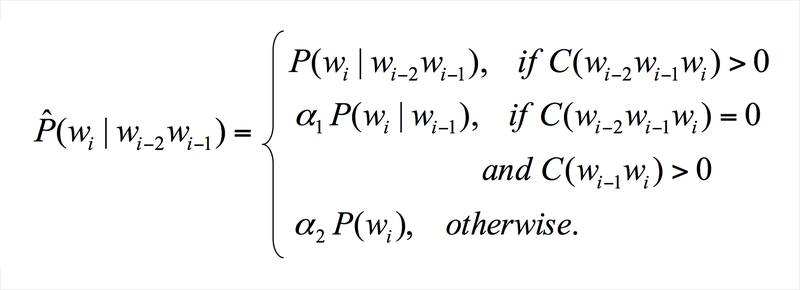
- 토큰화의 끝판왕으로 보이는 이 WPM은 아쉽게도 공개되어 있지는 않습니다. 
- 대신에 구글의 [SentencePiece](https://github.com/google/sentencepiece) 라이브러리를 통해 고성능의 BPE를 사용할 수 있습니다. SentencePiece에는 전처리 과정도 포함되어 있어서, 데이터를 따로 정제할 필요가 없어 간편하기까지 합니다.

- 참고 : [확률과 가능도 그리고 최대우도추정](https://jjangjjong.tistory.com/41)
- Likelihood 정리하기 !!

- 이제 어떤 언어에도 OOV 발생 우려 없이 안정적으로 활용할 수 있는 토크나이징 기술을 확보했습니다. 
- Embedding 레이어는 선언 즉시 랜덤한 실수로 Weight 값을 채우고, 학습을 진행하며 적당히 튜닝해가는 방식으로 속성을 맞춰가지만, 토큰들이 멋진 의미를 갖는 방법은 없을까요? 

# 6. 토큰에게 의미를..!
- 각 토큰들이 랜덤하게 부여된 실수로 살아가지 않게, 그들끼리 유사도 연산을 할 수 있게 의미를 부여하는 알고리즘 중 대표적인 3가지만 알아봅니다.

## Word2Vec
- " 단어를 벡터로 만든다"
- 문장의 각 단어, 즉 동시에 등장하는 단어끼리는 연관성이 있다는 아이디어로 시작된 알고리즘입니다. 
- 예를 들어 "난 오늘 토마토 주스를 마셨어" 에서 주스와 마셨어는 높은 연관성이 있습니다. 
- Word2Vec에는 CBOW, Skip-gram 두가지 방식이 존재합니다. (논리적으론 CBOW가 좋아 보이지만) Skip-gram이 실제 실험에선 다소 우세하다.
- Word2Vec은 은닉층이 1개 이기 때문에 Deep Neural Network가 아닌, Shallow Neural Network 라 칭합니다. 
- 
- 참고 : [Word2Vec_wikidocs](https://wikidocs.net/22660)

## FastText
- Word2Vec은 연산의 빈부격차가 존재합니다. 자주 등장하지 않는 단어는 최악의 경우 단 한번만의 연산만을 거쳐 랜덤하게 초기화된 값과 크게 다르지 않은 상태로 알고리즘이 종료될 수 있습니다. 
- FastText는 연산의 빈부격차 문제를 해결하기 위해 BPE와 비슷한 아이디어를 적용했습니다.
- 기존의 단어마다 Embedding을 할당하던 방식과 달리, FastText는 한 단어를 n-gram의 집합이라고 보고 단어를 쪼개어 각 n-gram에 할당된 Embedding의 평균값을 사용했습니다. 

- 참고 : [FastText의 등장(2016)](https://brunch.co.kr/@learning/7)

## ELMo - the 1st Contextualized Word Embedding
- 위에 소개한 Word Embedding 알고리즘들은 훌륭하지만, '고정적'이라는 고질적 문제점이 있습니다. 즉 '동음이의어'를 처리할 수 없다는 것입니다. 
    - 나는 초록색의 아삭한 아오리 사과를 가장 좋아합니다.
    - 저의 간절한 사과를 받아주시기 바랍니다.
- Word2Vec이나 FastText에서 위 두 문장에 나오는 사과의 워드 벡터값은 동일할 것입니다. 
- 의미가 다른 두 '사과'의 의미를 명확하게 해석하려면, 즉 Context-sensitive Grammar를 따르는 자연어를 이해하려면 문맥(context)의 활용이 필수적입니다. 
- 여기서 '사과'의 context가 되는 것은, 첫문장의 경우엔 '초록색의 아삭한 아오리' 가 될 것이고, 다음 문장에서는 '간절한'이 될 것입니다. 
- 즉 단어의 의미 벡터를 구하기 위해서는 그 단어만 필요한 것이 아니라, 그 단어가 놓은 주변 단어 배치의 맥락이 함께 고려되는 Word Embedding이 필요한 것입니다. 이러한 개념을 **Contextualized Word Embedding**이라고 합니다. 
- 2018년 NLP계에 큰 폭풍을 몰고 왔던 ELMo 라는 모델은 데이터에 단어가 등장한 순간, 그 주변 단어 정보를 사용해 Embedding을 구축하는 개념을 처음 소개하면서 자연어처리의 획기적인 발전의 계기를 마련해 준 첫번째 Contextualized Word Embedding 모델입니다. 
- 양방향 LSTM을 활용한 ELMo 모델에서 기존 어휘 임베딩(입력 토큰의 word vector), 순방향 LSTM의 hidden state vector, 역방향 LSTM의 hidden state vector를 concatenate한 벡터가 Contextual Word Embedding이 됩니다.
- ELMo나 BERT 등 지금도 많이 사용되고 있는 Contextualized Word Embedding 모델의 개념은 차근차근 구체적으로 다뤄보겠습니다. 
- 참고: [전이학습 기반 NLP (1): ELM0](https://brunch.co.kr/@learning/12)
